In [8]:
import os
import random
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import model_selection
from sklearn import preprocessing
import IPython.display as ipd

In [9]:
# define directories
base_dir = "./"
esc_dir = os.path.join(base_dir, "ESC-50-master")
meta_file = os.path.join(esc_dir, "meta/esc50.csv")
audio_dir = os.path.join(esc_dir, "audio/")

# load metadata
meta_data = pd.read_csv(meta_file)

# save train?
SAVE_DATA = True

In [10]:
meta_data.head(10)

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
5,1-101296-B-19.wav,1,19,thunderstorm,False,101296,B
6,1-101336-A-30.wav,1,30,door_wood_knock,False,101336,A
7,1-101404-A-34.wav,1,34,can_opening,False,101404,A
8,1-103298-A-9.wav,1,9,crow,False,103298,A
9,1-103995-A-30.wav,1,30,door_wood_knock,False,103995,A


In [11]:
# get data size
data_size = meta_data.shape
print(data_size)

# arrange target label and its name
class_dict = {}
for i in range(data_size[0]):
    if meta_data.loc[i,"target"] not in class_dict.keys():
        class_dict[meta_data.loc[i,"target"]] = meta_data.loc[i,"category"]

(2000, 7)


In [12]:
class_dict[0]


'dog'

wave size:(220500,)
melsp size:(128, 1723)
samping rate:44100


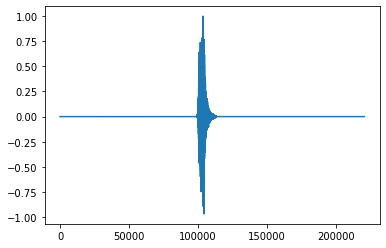

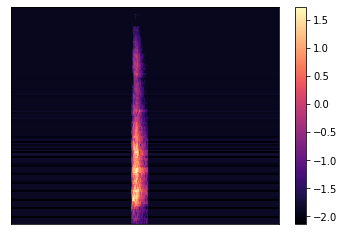

In [17]:
# load a wave data
def load_wave_data(audio_dir, file_name):
    file_path = os.path.join(audio_dir, file_name)
    x, fs = librosa.load(file_path, sr=44100)
    return x,fs

# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

# display wave in plots
def show_wave(x):
    plt.plot(x)
    plt.show()

# display wave in heatmap
def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs)
    plt.colorbar()
    plt.show()

# example data
x, fs = load_wave_data(audio_dir, meta_data.loc[0,"filename"])
melsp = calculate_melsp(x)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x.shape, melsp.shape, fs))
show_wave(x)
show_melsp(melsp, fs)

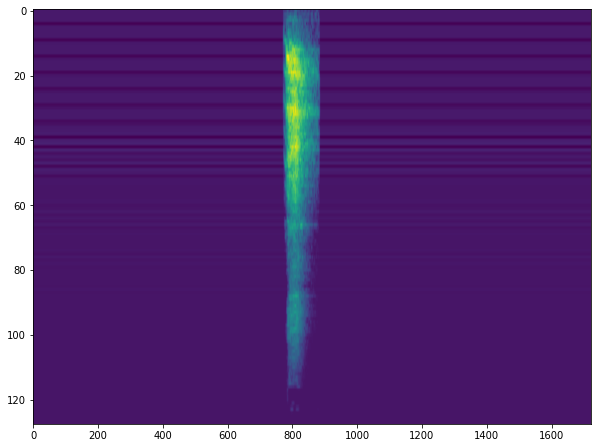

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(melsp, aspect=10)
# plt.imsave("sample", melsp)

## make dataset

In [10]:
# get training dataset and target dataset
x = list(meta_data.loc[:,"filename"])
y = list(meta_data.loc[:, "target"])

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, stratify=y, )

In [11]:
print(x_train[0], class_dict[y_train[0]])

1-49409-B-8.wav sheep


wavデータをメルスペクトラムに変換し、npz形式で保存。

In [13]:
import os
os.makedirs("data", exist_ok=True)

In [14]:
len(x)

2000

In [15]:
if SAVE_DATA:
    for i in range(len(x)):
        try:
            # load wave
            x, fs = load_wave_data(audio_dir, meta_data.loc[i,"filename"])

            # cvt 2 melsp
            melsp = calculate_melsp(x)

            # save mel spectrum
            np.savez_compressed("data/{}".format(meta_data.loc[i,"filename"]), melsp)
        except:
            print("oops, failed!")


In [18]:
# test load
data = np.load("data/{}.npz".format(meta_data.loc[0,"filename"]))["arr_0"]

(128, 1723)
